In [1]:
#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as plt
import pandas as pd
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import xarray as xr              
import zipfile
import scipy.io
import pickle
from scipy.optimize import curve_fit



In [2]:
#%% Directory
dir_ = "/projects/storm/mgomez/idealSims/"

inputFile = "input_sounding"



In [19]:
#%% Load data from input files
sounding_28_cat4 = np.loadtxt(dir_ + inputFile + "_28",skiprows=1) # [z,theta,q,u,v]
sounding_30_cat3 = np.loadtxt(dir_ + inputFile + "_30",skiprows=1) # [z,theta,q,u,v]
sounding_32_cat5 = np.loadtxt(dir_ + inputFile + "_32",skiprows=1) # [z,theta,q,u,v]

sounding_31_cat4 = 0.5*(sounding_30_cat3 + sounding_32_cat5)


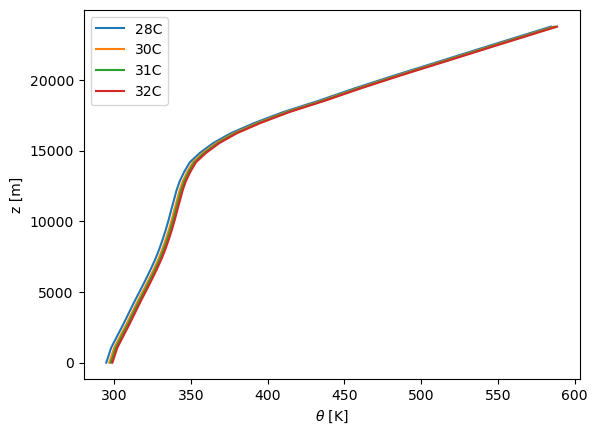

In [20]:
#%% Plot potential temperature data
plt.figure()
plt.plot(sounding_28_cat4[:,1],sounding_28_cat4[:,0],label='28C')
plt.plot(sounding_30_cat3[:,1],sounding_30_cat3[:,0],label='30C')
plt.plot(sounding_31_cat4[:,1],sounding_31_cat4[:,0],label='31C')
plt.plot(sounding_32_cat5[:,1],sounding_32_cat5[:,0],label='32C')
plt.legend()
plt.xlabel(r"$\theta$ [K]")
plt.ylabel("z [m]")
plt.show()
plt.close()


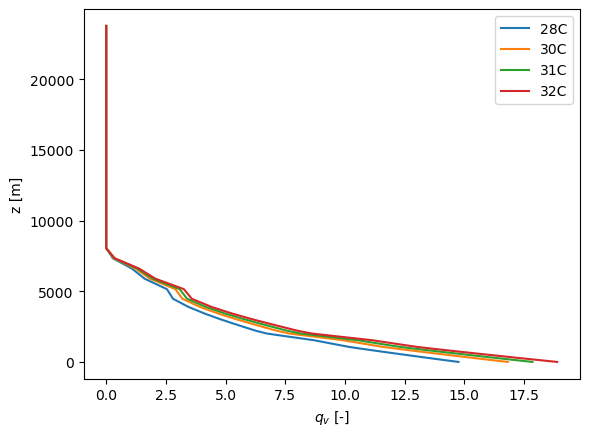

In [21]:
#%% Plot moisture data
plt.figure()
plt.plot(sounding_28_cat4[:,2],sounding_28_cat4[:,0],label='28C')
plt.plot(sounding_30_cat3[:,2],sounding_30_cat3[:,0],label='30C')
plt.plot(sounding_31_cat4[:,2],sounding_31_cat4[:,0],label='31C')
plt.plot(sounding_32_cat5[:,2],sounding_32_cat5[:,0],label='32C')
plt.legend()
plt.xlabel(r"$q_v$ [-]")
plt.ylabel("z [m]")
plt.show()
plt.close()

In [30]:
#%% Define function that truncates string to given length

def cutStr_len(str_in,len_out):
    str_out = str_in
    if len(str_out)>len_out:
        str_out = str_out[0:len_out]
    elif len(str_out)<len_out:
        while len(str_out)<len_out:
            str_out = str_out + '0'
    return str_out

In [33]:
#%% Save sounding
fName = inputFile + "_31"

theta_s = 0.5*(303.140000 + 301.140000)
q_s = 0.5*(20.1487360 + 17.9449680)
print(theta_s)
print(q_s)


with open(dir_ + fName, 'w') as f:
    strr = cutStr_len('1015.10000',12) + '          ' + cutStr_len('302.140000',12) + '          ' + cutStr_len('19.0468520',12)
    f.write(strr)
    f.write('\n')
    for i_l in np.arange(np.shape(sounding_31_cat4)[0]):
        strr = ''
        for i_r in np.arange(np.shape(sounding_31_cat4)[1]):
            strr = strr + cutStr_len(str(sounding_31_cat4[i_l,i_r]),12) + '          '
        f.write(strr)
        f.write('\n')
        

302.14
19.046852
